In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
df_users = pd.read_csv("/content/drive/MyDrive/users.csv")
df_fusers = pd.read_csv("/content/drive/MyDrive/fusers.csv")

df_users['isFake'] = 0
df_fusers['isFake'] = 1

In [ ]:
df_allUsers = pd.concat([df_fusers, df_users], ignore_index=True)
df_allUsers = df_allUsers.sample(frac=1).reset_index(drop=True)

In [ ]:
X = df_allUsers.drop(["isFake"], axis=1)
Y = df_allUsers['isFake']
print(X['lang'].head)
print(df_allUsers.head())

<bound method NDFrame.head of 0       en
1       es
2       en
3       fr
4       en
        ..
6820    en
6821    en
6822    en
6823    en
6824    en
Name: lang, Length: 6825, dtype: object>
           id                  name      screen_name  statuses_count  \
0    39220893                 Sam P     booleanvalue           11688   
1   168686865  Eduardo Orta Beltran      eduardoorta               5   
2  1174453920      Francoise Chavez  ChavezqiuFranco              12   
3  2752784274            ¤ Blaise ¤        smashy321           30833   
4   786095406       BBoy Katarungan        Roiibert_           24289   

   followers_count  friends_count  favourites_count  listed_count  \
0             1201           1191               351            61   
1               19            411                 0             0   
2               13            212                 0             0   
3             1519           1993             25614            42   
4              500            

In [ ]:
X = X[[
    "statuses_count",
    "followers_count",
    "friends_count",
    "favourites_count",
    "lang",
    "listed_count",
    "geo_enabled",
    "profile_use_background_image"
]]
#UNDER REVIEW RAHEGA..... DESCRIPTION KO USE KAR SAKHTE HAI LATER ON IN NLP

if X['lang'].isna().any():
    X['lang'].fillna('unknown', inplace=True)

#THERE ARE MORE ENCODERS down to check accuracy at each combination

encoder = OneHotEncoder()
encoded_lang = encoder.fit_transform(X[['lang']]).toarray()


encoded_lang_df = pd.DataFrame(encoded_lang, columns=encoder.categories_[0])


X = pd.concat([X, encoded_lang_df], axis=1)


X.drop('lang', axis=1, inplace=True)

print(X.head(1))
print(X.dtypes)

   statuses_count  followers_count  friends_count  favourites_count  \
0           11688             1201           1191               351   

   listed_count  geo_enabled  profile_use_background_image  \
0            61          1.0                           1.0   

   Select Language...   ar   da  ...   nl   pl   pt   ru   sv   tr  xx-lc  \
0                 0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0    0.0   

   zh-TW  zh-cn  zh-tw  
0    0.0    0.0    0.0  

[1 rows x 33 columns]
statuses_count                    int64
followers_count                   int64
friends_count                     int64
favourites_count                  int64
listed_count                      int64
geo_enabled                     float64
profile_use_background_image    float64
Select Language...              float64
ar                              float64
da                              float64
de                              float64
el                              float64
en                      

In [ ]:
X = X.replace(np.nan, 0)
# there will be more scalers downwards
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)


In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid'),
])


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train, epochs=30, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/30
171/171 [==============================] - 4s 8ms/step - loss: 0.5729 - accuracy: 0.7689 - val_loss: 0.4122 - val_accuracy: 0.8806
Epoch 2/30
171/171 [==============================] - 1s 4ms/step - loss: 0.3918 - accuracy: 0.8562 - val_loss: 0.3609 - val_accuracy: 0.9114
Epoch 3/30
171/171 [==============================] - 1s 4ms/step - loss: 0.3261 - accuracy: 0.8810 - val_loss: 0.3518 - val_accuracy: 0.9267
Epoch 4/30
171/171 [==============================] - 1s 3ms/step - loss: 0.2845 - accuracy: 0.8996 - val_loss: 0.3679 - val_accuracy: 0.9377
Epoch 5/30
171/171 [==============================] - 1s 3ms/step - loss: 0.2401 - accuracy: 0.9130 - val_loss: 0.3908 - val_accuracy: 0.9465
Epoch 6/30
171/171 [==============================] - 1s 3ms/step - loss: 0.2216 - accuracy: 0.9222 - val_loss: 0.4466 - val_accuracy: 0.9414
Epoch 7/30
171/171 [==============================] - 1s 4ms/step - loss: 0.1922 - accuracy: 0.9364 - val_loss: 0.5034 - val_accuracy: 0.8242
Epoch 

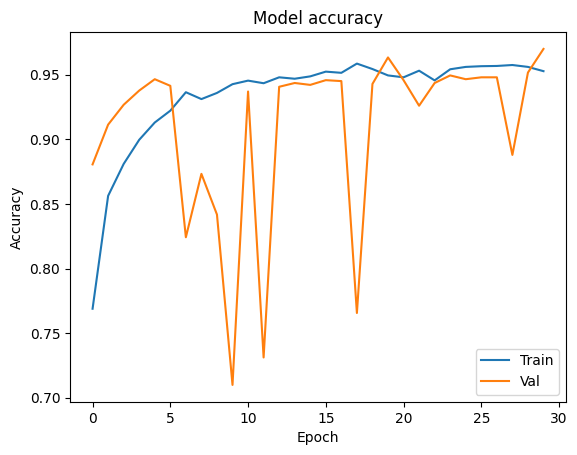

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='lower right')
plt.show()


In [ ]:
prediction = model.predict(X_test[136:137])
prediction = prediction[0]
print('Prediction\n',prediction)
print('\nThresholded output\n',(prediction>0.5)*1)

1/1 [==============================] - 1s 1s/step
Prediction
 [0.9035644]

Thresholded output
 [1]


Epoch 1/10
171/171 [==============================] - 2s 5ms/step - loss: 0.4847 - accuracy: 0.8134 - val_loss: 0.3184 - val_accuracy: 0.8799
Epoch 2/10
171/171 [==============================] - 1s 5ms/step - loss: 0.3510 - accuracy: 0.8766 - val_loss: 0.2655 - val_accuracy: 0.9048
Epoch 3/10
171/171 [==============================] - 1s 3ms/step - loss: 0.3021 - accuracy: 0.9007 - val_loss: 0.2258 - val_accuracy: 0.9150
Epoch 4/10
171/171 [==============================] - 1s 3ms/step - loss: 0.2458 - accuracy: 0.9139 - val_loss: 0.1925 - val_accuracy: 0.9341
Epoch 5/10
171/171 [==============================] - 1s 4ms/step - loss: 0.2302 - accuracy: 0.9194 - val_loss: 0.1690 - val_accuracy: 0.9421
Epoch 6/10
171/171 [==============================] - 1s 3ms/step - loss: 0.2061 - accuracy: 0.9300 - val_loss: 0.1521 - val_accuracy: 0.9443
Epoch 7/10
171/171 [==============================] - 1s 3ms/step - loss: 0.1823 - accuracy: 0.9390 - val_loss: 0.1347 - val_accuracy: 0.9458
Epoch 

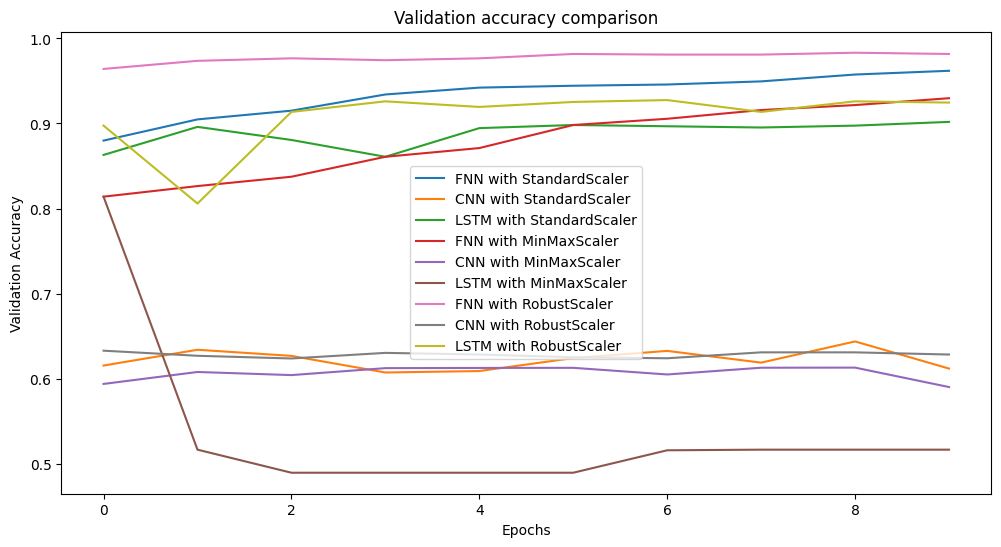

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Define the preprocessing methods
preprocessing_methods = {'StandardScaler': StandardScaler(), 'MinMaxScaler': MinMaxScaler(), 'RobustScaler': RobustScaler()}

# Define the models
def create_fnn():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid'),
    ])
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def create_cnn():
    model = Sequential([
        Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
        MaxPooling1D(2),
        Conv1D(64, 3, activation='relu'),
        MaxPooling1D(2),
        Dense(1, activation='sigmoid'),
    ])
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def create_lstm():
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        LSTM(64),
        Dense(1, activation='sigmoid'),
    ])
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

models = {'FNN': create_fnn, 'CNN': create_cnn, 'LSTM': create_lstm}

import matplotlib.pyplot as plt

# Initialize a dictionary to store the history for each model
history_dict = {}

for preprocessing_name, preprocessing in preprocessing_methods.items():
    X_train_preprocessed = preprocessing.fit_transform(X_train)
    X_test_preprocessed = preprocessing.transform(X_test)

    for model_name, create_model in models.items():
        model = create_model()
        history = model.fit(X_train_preprocessed, Y_train, epochs=10, batch_size=32, validation_data=(X_test_preprocessed, Y_test))

        # Store the history
        history_dict[f'{model_name} with {preprocessing_name}'] = history

# Plot the validation accuracy of each model
plt.figure(figsize=(12, 6))

for model_name, history in history_dict.items():
    val_acc = history.history['val_accuracy']
    plt.plot(val_acc, label=model_name)

plt.title('Validation accuracy comparison')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()